# **DELHIVERY CASE STUDY**

Delhivery was established in May 2011 as SSN Logistics Ltd, initially conceptualised as a hyperlocal express delivery service provider for offline stores, delivering flowers and food in Gurgaon. During that time, the online retailing and e-commerce segment was expanding rapidly in India, with global investors showing significant interest in the industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:00<00:00, 114MB/s]


In [3]:
df = pd.read_csv('delhivery_data.csv?1642751181')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# **DATA DESCRIPTION**

**DATA TYPES:**

The data type of each series in the dataset is determined below. "int64" resembles numerical variables in the dataframe whereas "object" denotes categorical variables or string data.

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


**SHAPE OF DATA:**

The shape of the data 144867 rows and 24 columns, determined below.

In [5]:
df.shape

(144867, 24)

**DATA INFO:**

The dataset consists of 144867 customer records with 24 attributes each, all of which are complete (no missing data).
It includes both categorical, numerical variables along with datetime features suitable for mixed-type analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**DATA COUNT:**

The unique count of values under each attribute in the data is determined below.

In [7]:
for i in df.columns:
  print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


**DUPLICATE ENTRIES:**

This data contains no duplicate entries.

In [8]:
df.duplicated().sum()

np.int64(0)

**NULL ENTRIES:**

There are 293 null entries in the source_name column and 261 null entries in the destination_name column throughout in this dataset. These null entries can be filled by mapping source_name with source_center and same for destination_name with destination_center, which will make it easier to perform EDA functions.

In [9]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [10]:
source_map = df.dropna(subset=['source_name']).set_index('source_center')['source_name'].to_dict()
dest_map = df.dropna(subset=['destination_name']).set_index('destination_center')['destination_name'].to_dict()

df['source_name'] = df['source_center'].map(source_map).fillna(df['source_name'])
df['destination_name'] = df['destination_center'].map(dest_map).fillna(df['destination_name'])

print('Null Values in source_name:',df['source_name'].isnull().sum())
print('Null Values in destination_name:',df['destination_name'].isnull().sum())

Null Values in source_name: 293
Null Values in destination_name: 261


# **DATA DISTRIBUTION**

This dataset captures detailed trip-level logistics information, including route schedules, trip timings, source–destination details, and distance–time metrics. It contains both categorical and numerical variables, with a mix of time-based and distance-based attributes. While most numeric features such as actual_time, osrm_time, and actual_distance_to_destination show a right-skewed distribution due to a few long-haul deliveries, categorical features like route_type, source_center, and destination_center display a diverse spread of operational routes and regions. Overall, the data exhibits variability typical of transportation and delivery systems, where most trips are short to medium range, and a smaller proportion represent long-duration or high-distance deliveries.


In [11]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


**DATA DISTRIBUTION (INCLUDES ONLY OBJECT)**

The descriptive summary of object-type columns provides an overview of the categorical features in the dataset. Columns such as route_type, source_name, and destination_name contain multiple unique categories, indicating diverse trip origins, destinations, and transportation types. This overview helps in understanding the spread and uniqueness of categorical variables, which will be useful for grouping, encoding, or segmentation in later stages.

In [12]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


**DATA DISTRIBUTION (INCLUDES ALL DATA TYPES)**

The combined summary of all columns provides a holistic view of both numerical and categorical variables in the dataset. It highlights key statistics such as counts, means, standard deviations, and percentiles for numeric features like distance and time, while also showing the number of unique values and most frequent categories for object-type columns. The results indicate that most numeric variables have a wide range and are positively skewed due to outliers in long-distance or delayed trips.

In [13]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


**CONVERTING SERIES INTO DATETIME FORMAT**

The columns trip_creation_time, od_start_time, od_end_time, cutoff_timestamp are datetime data but exist in object format. Converting these columns makes it easier for analysing the structure and characteristics of the dataset.

In [14]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], format='mixed')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], format='mixed')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], format='mixed')
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], format='mixed')
df[['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']]

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55.000000
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55.000000
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57.000000
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55.000000
...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20.000000
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18.000000
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18.000000
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19.000000


**CORRELATION BETWEEN NUMERICAL/CONTINUOUS VARIABLES**

The correlation between all the continuous or numeric variables in the dataset is determined below with the help of a heatmap. The correlation matrix reveals the relationships among the numerical features in the dataset. Strong positive correlations are likely observed between variables such as actual_time and osrm_time, and between actual_distance_to_destination and osrm_distance, indicating that longer distances generally lead to higher travel times — both actual and estimated.

In [15]:
df.corr(numeric_only=True)

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
start_scan_to_end_scan,1.000000,0.299099,0.784673,0.785006,0.785937,0.785298,0.784138,-0.023193,0.093301,0.219848,0.306983,-0.020227
is_cutoff,0.299099,1.000000,0.190815,0.191571,0.168265,0.186484,0.188245,-0.121386,-0.007042,0.216321,0.254645,-0.106569
cutoff_factor,0.784673,0.190815,1.000000,0.999986,0.978720,0.995833,0.997116,-0.064551,0.044986,0.157936,0.231106,-0.031452
actual_distance_to_destination,0.785006,0.191571,0.999986,1.000000,0.978659,0.995872,0.997149,-0.064736,0.045241,0.158832,0.232119,-0.031603
actual_time,0.785937,0.168265,0.978720,0.978659,1.000000,0.977998,0.979399,0.033502,0.124411,0.171465,0.242282,0.017558
osrm_time,0.785298,0.186484,0.995833,0.995872,0.977998,1.000000,0.999119,-0.069074,0.049892,0.177066,0.242282,-0.033057
osrm_distance,0.784138,0.188245,0.997116,0.997149,0.979399,0.999119,1.000000,-0.065384,0.048705,0.169151,0.239669,-0.031805
factor,-0.023193,-0.121386,-0.064551,-0.064736,0.033502,-0.069074,-0.065384,1.000000,0.518388,-0.053187,-0.036761,0.540403
segment_actual_time,0.093301,-0.007042,0.044986,0.045241,0.124411,0.049892,0.048705,0.518388,1.000000,0.433422,0.448959,0.483864
segment_osrm_time,0.219848,0.216321,0.157936,0.158832,0.171465,0.177066,0.169151,-0.053187,0.433422,1.000000,0.948523,-0.068447


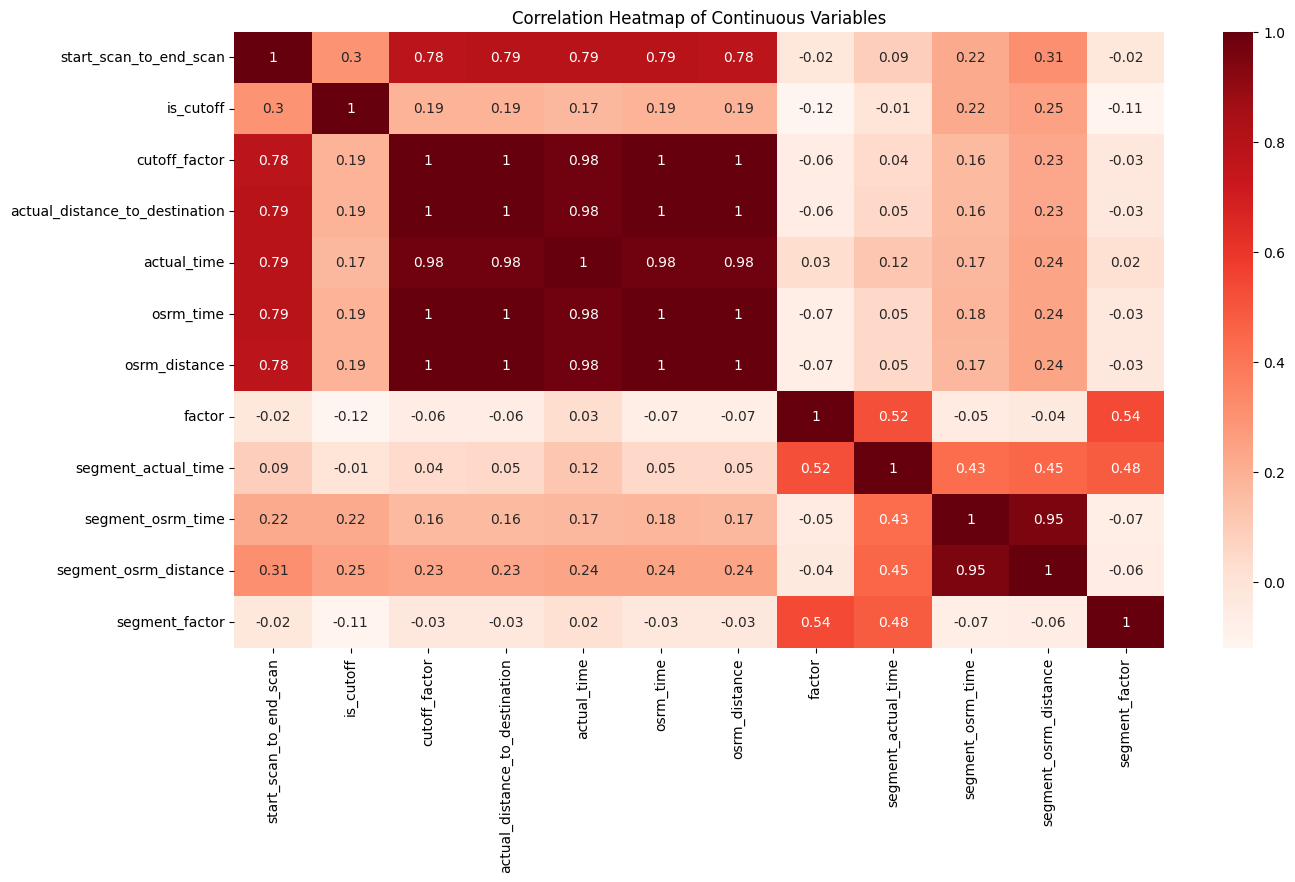

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(df.corr(numeric_only=True),2), cmap='Reds', annot=True)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

**OBSERVING AND HIGHLIGHTING HIGHLY CORRELATED COLUMNS**

The correlation heatmap and variance values provide a clear understanding of how continuous features in the dataset relate to each other and how they vary in scale. High positive correlations are observed between actual_time and osrm_time, as well as between actual_distance_to_destination and these time variables, indicating that trips with greater distances consistently take longer durations, both in actual and estimated terms.

In [17]:
round(df[['cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']].corr(),2)

,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
cutoff_factor,1.00,1.00,0.98,1.00,1.00
actual_distance_to_destination,1.00,1.00,0.98,1.00,1.00
actual_time,0.98,0.98,1.00,0.98,0.98
osrm_time,1.00,1.00,0.98,1.00,1.00
osrm_distance,1.00,1.00,0.98,1.00,1.00


In [18]:
df[['cutoff_factor','actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance']].var()

,0
cutoff_factor,118856.407679
actual_distance_to_destination,119018.106434
actual_time,357727.941726
osrm_time,94870.828360
osrm_distance,177341.459792


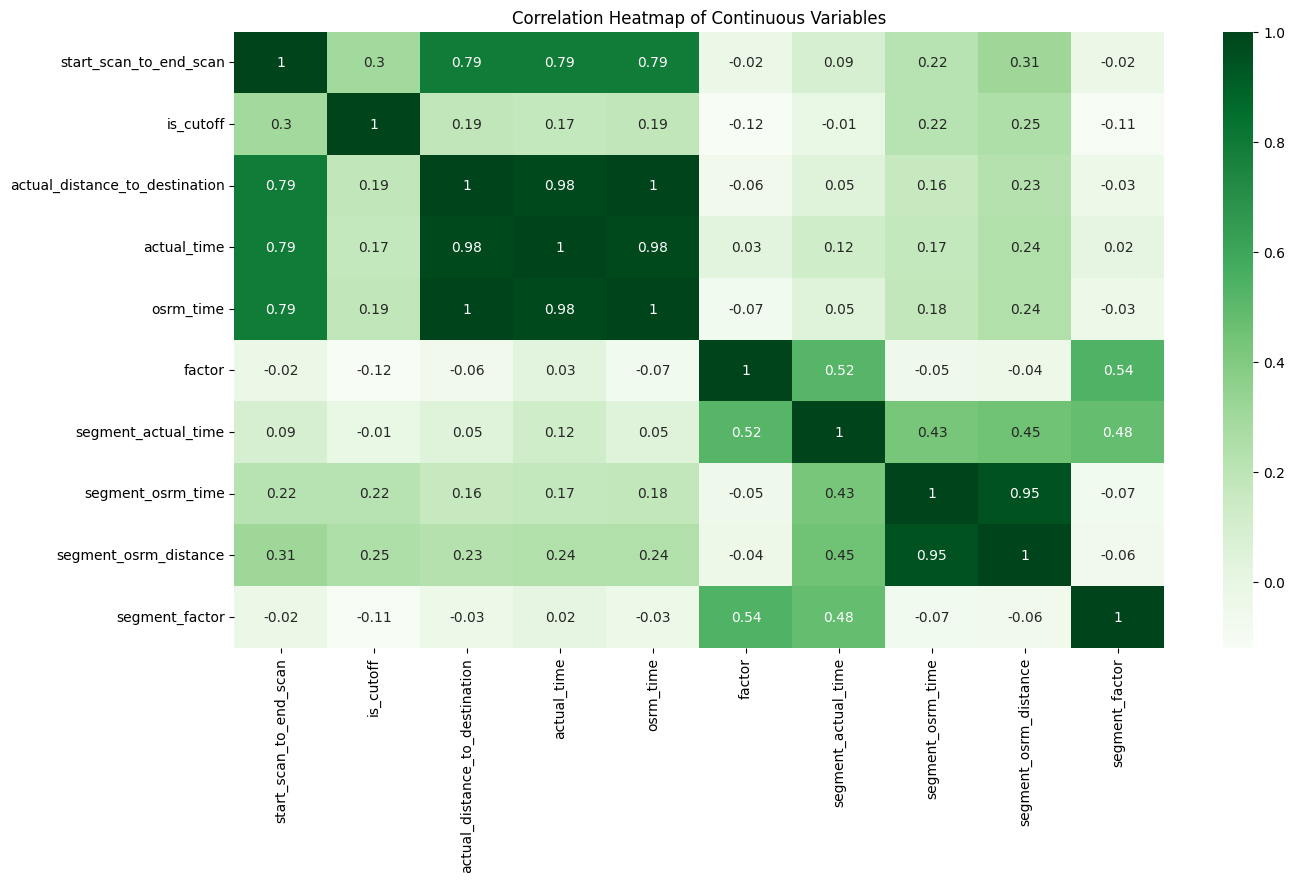

In [19]:
cols_to_drop = ['osrm_distance', 'cutoff_factor']
df_heat = df.drop(columns=cols_to_drop, errors='ignore')
plt.figure(figsize=(15, 8))
sns.heatmap(round(df_heat.corr(numeric_only=True),2), cmap='Greens', annot=True)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# **OUTLIER DETECTION**

**OUTLIERS IN START_SCAN_TO_END_SCAN:**

There are 373 outliers in the start_scan_to_end_scan column, detected by using the IQR method.

In [20]:
Q1 = df['start_scan_to_end_scan'].quantile(0.25)
Q3 = df['start_scan_to_end_scan'].quantile(0.75)
IQR  = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_scan = df[(df['start_scan_to_end_scan'] < lower) | (df['start_scan_to_end_scan'] > upper)]
print(f"Outliers in Start Scan to End Scan(time - in hours): {len(outliers_scan)} rows")
outliers_scan['start_scan_to_end_scan']

Outliers in Start Scan to End Scan(time - in hours): 373 rows


,start_scan_to_end_scan
32950,3897.0
32951,3897.0
32952,3897.0
32953,3897.0
32954,3897.0
...,...
79524,4239.0
79525,4239.0
79526,4239.0
79527,4239.0


**OUTLIERS IN CUTOFF_FACTOR:**

There are 17246 outliers in the cutoff_factor column detected through the IQR method.

In [21]:
Q1 = df['cutoff_factor'].quantile(0.25)
Q3 = df['cutoff_factor'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_cutoff = df[(df['cutoff_factor'] < lower) | (df['cutoff_factor'] > upper)]
print(f"Outliers in Cut-off Factor: {len(outliers_cutoff)} rows")
outliers_cutoff['cutoff_factor']

Outliers in Cut-off Factor: 17246 rows


,cutoff_factor
402,704
403,726
404,748
405,770
406,792
...,...
144796,1606
144797,1628
144798,1650
144799,1672


**OUTLIERS IN ACTUAL_DISTANCE_TO_DESTINATION:**

There are 17992 outliers in the actual_distance_to_destination column detected through the IQR method.

In [22]:
Q1 = df['actual_distance_to_destination'].quantile(0.25)
Q3 = df['actual_distance_to_destination'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_distance = df[(df['actual_distance_to_destination'] < lower) | (df['actual_distance_to_destination'] > upper)]
print(f"Outliers in Actual Distance to Destination: {len(outliers_distance)} rows")
outliers_distance['actual_distance_to_destination']

Outliers in Actual Distance to Destination: 17992 rows


,actual_distance_to_destination
401,682.175085
402,704.090688
403,726.181078
404,748.332196
405,770.365887
...,...
144796,1611.171536
144797,1633.419313
144798,1650.202066
144799,1673.310381


**OUTLIERS IN ACTUAL_TIME:**

There are 16633 outliers in the actual_time column detected through the IQR method.

In [23]:
Q1 = df['actual_time'].quantile(0.25)
Q3 = df['actual_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_actual_time = df[(df['actual_time'] < lower) | (df['actual_time'] > upper)]
print(f"Outliers in Actual Time(in hours): {len(outliers_actual_time)} rows")
outliers_actual_time['actual_time']

Outliers in Actual Time(in hours): 16633 rows


,actual_time
406,1211.0
407,1241.0
408,1277.0
409,1305.0
410,1322.0
...,...
144796,2640.0
144797,2675.0
144798,2700.0
144799,2736.0


**OUTLIERS IN OSRM_TIME:**


There are 17603 outliers in the osrm_time column detected through the IQR method.

In [24]:
Q1 = df['osrm_time'].quantile(0.25)
Q3 = df['osrm_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_osrm_time = df[(df['osrm_time'] < lower) | (df['osrm_time'] > upper)]
print(f"Outliers in OSRM Time(in hours): {len(outliers_osrm_time)} rows")
outliers_osrm_time['osrm_time']

Outliers in OSRM Time(in hours): 17603 rows


,osrm_time
404,606.0
405,630.0
406,641.0
407,655.0
408,671.0
...,...
144796,1492.0
144797,1512.0
144798,1532.0
144799,1549.0


**OUTLIERS IN OSRM_DISTANCE:**


There are 17816 outliers in the osrm_distance column detected through the IQR method.

In [25]:
Q1 = df['osrm_distance'].quantile(0.25)
Q3 = df['osrm_distance'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_osrm_distance = df[(df['osrm_distance'] < lower) | (df['osrm_distance'] > upper)]
print(f"Outliers in OSRM Distance: {len(outliers_osrm_distance)} rows")
outliers_osrm_distance['osrm_distance']

Outliers in OSRM Distance: 17816 rows


,osrm_distance
404,816.5632
405,850.4080
406,865.7213
407,886.1183
408,908.4596
...,...
144796,1980.0975
144797,2008.9586
144798,2036.3992
144799,2059.0195


**OUTLIERS IN FACTOR:**


There are 11249 outliers in the factor column detected through the IQR method.

In [26]:
Q1 = df['factor'].quantile(0.25)
Q3 = df['factor'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_factor = df[(df['factor'] < lower) | (df['factor'] > upper)]
print(f"Outliers in Factor: {len(outliers_factor)} rows")
outliers_factor['factor']

Outliers in Factor: 11429 rows


,factor
15,4.181818
16,3.750000
76,4.200000
77,3.833333
78,3.230769
...,...
144634,0.625000
144658,4.777778
144848,11.096774
144854,3.200000


**OUTLIERS IN SEGMENT_ACTUAL_TIME**


There are 9298 outliers in the segment_actual_time column detected through the IQR method.

In [27]:
Q1 = df['segment_actual_time'].quantile(0.25)
Q3 = df['segment_actual_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_segment_actual_time = df[(df['segment_actual_time'] < lower) | (df['segment_actual_time'] > upper)]
print(f"Outliers in Segment Actual Time(in hours): {len(outliers_segment_actual_time)} rows")
outliers_segment_actual_time['segment_actual_time']

Outliers in Segment Actual Time(in hours): 9298 rows


,segment_actual_time
21,93.0
34,94.0
72,75.0
73,78.0
106,79.0
...,...
144790,83.0
144819,88.0
144848,302.0
144853,91.0


**OUTLIERS IN SEGMENT_OSRM_TIME:**


There are 6378 outliers in the segment_osrm_time column detected through the IQR method.

In [28]:
Q1 = df['segment_osrm_time'].quantile(0.25)
Q3 = df['segment_osrm_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_segment_osrm_time = df[(df['segment_osrm_time'] < lower) | (df['segment_osrm_time'] > upper)]
print(f"Outliers in Segment OSRM Time(in hours): {len(outliers_segment_osrm_time)} rows")
outliers_segment_osrm_time['segment_osrm_time']

Outliers in Segment OSRM Time(in hours): 6378 rows


,segment_osrm_time
34,70.0
38,45.0
157,81.0
158,81.0
214,44.0
...,...
144802,48.0
144829,74.0
144837,42.0
144843,43.0


**OUTLIERS IN SEGMENT_OSRM_DISTANCE:**


There are 4315 outliers in the segment_osrm_distance column detected through the IQR method.

In [29]:
Q1 = df['segment_osrm_distance'].quantile(0.25)
Q3 = df['segment_osrm_distance'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_segment_osrm_distance = df[(df['segment_osrm_distance'] < lower) | (df['segment_osrm_distance'] > upper)]
print(f"Outliers in Segment OSRM Distance: {len(outliers_segment_osrm_distance)} rows")
outliers_segment_osrm_distance['segment_osrm_distance']

Outliers in Segment OSRM Distance: 4315 rows


,segment_osrm_distance
34,72.5561
157,79.6653
158,82.4127
214,52.7136
316,60.0755
...,...
144774,60.6393
144802,61.0445
144829,70.0436
144837,60.4795


**OUTLIERS IN SEGMENT_FACTOR:**


There are 13976 outliers in the segment_factor column detected through the IQR method.

In [30]:
Q1 = df['segment_factor'].quantile(0.25)
Q3 = df['segment_factor'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_segment_factor = df[(df['segment_factor'] < lower) | (df['segment_factor'] > upper)]
print(f"Outliers in Segment Factor: {len(outliers_segment_factor)} rows")
outliers_segment_factor['segment_factor']

Outliers in Segment Factor: 13976 rows


,segment_factor
6,4.666667
9,4.333333
15,4.181818
47,-1.000000
54,-1.000000
...,...
144846,-1.000000
144848,27.454545
144852,3.785714
144853,6.500000


**BOXPLOTS OF CONTINUOUS VARIABLES WITH OUTLIERS:**

The boxplots of continuous variables is represented below dividing the continuous variables into 2 halves to look at each atttribute more precisely. Later, these outliers are clipped to the 5th-95th percentile to drop extreme outliers to maintain sanity in the dataset.

In [31]:
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Continuous Variables:", continuous_vars)

Continuous Variables: Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')


In [32]:
first_half = continuous_vars[:int(len(continuous_vars)/2)]
second_half = continuous_vars[int(len(continuous_vars)/2):]
print('First Half:',first_half)
print('Second Half:',second_half)

First Half: Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time'],
      dtype='object')
Second Half: Index(['osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')


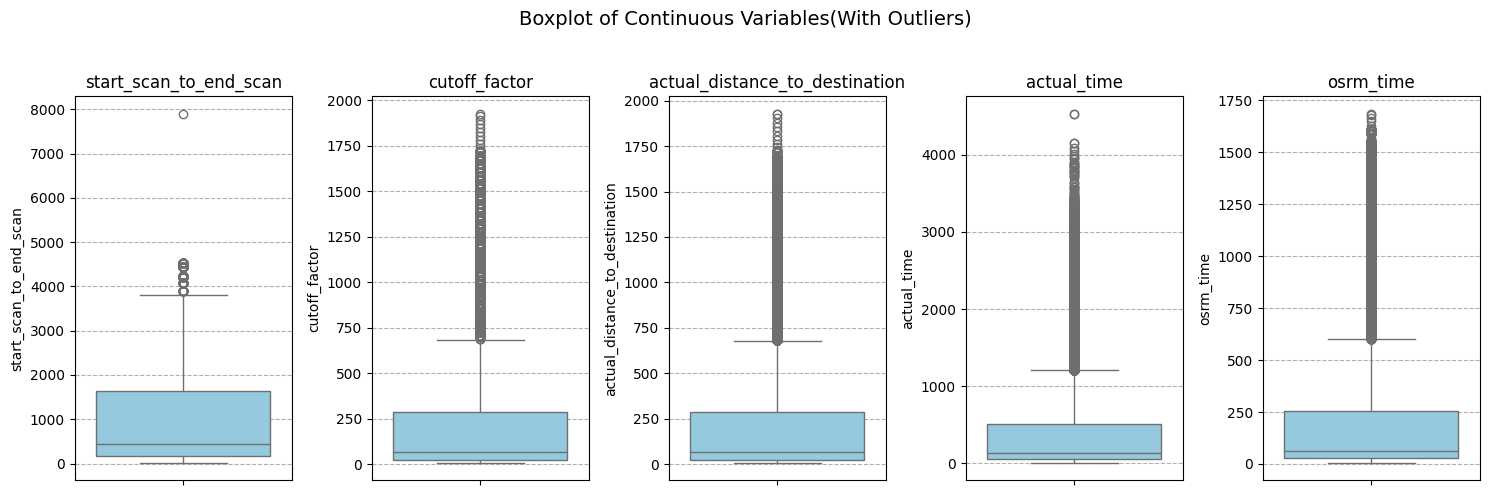

In [33]:
plt.figure(figsize=(15,5))
for i, col in enumerate(first_half):
  plt.subplot(1,len(first_half),i+1)
  sns.boxplot(y=df[col],color='skyblue')
  plt.title(col)
  plt.grid(axis='y', linestyle = '--')
plt.suptitle('Boxplot of Continuous Variables(With Outliers)',fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
for i, col in enumerate(second_half):
  plt.subplot(1,len(second_half),i+1)
  sns.boxplot(y=df[col],color='skyblue')
  plt.title(col)
  plt.grid(axis='y', linestyle = '--')
plt.suptitle('Boxplot of Continuous Variables(With Outliers)',fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**BOXPLOTS OF CONTINUOUS VARIABLES CLIPPED TO THE 5TH - 95TH PERCENTILE:**

In [ ]:
df_clip = df.copy()
for col in continuous_vars:
    lower = df_clip[col].quantile(0.05)
    upper = df_clip[col].quantile(0.95)
    df_clip[col] = np.clip(df_clip[col],lower,upper)

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(first_half):
    plt.subplot(1, len(first_half), i+1)
    sns.boxplot(y=df_clip[col], color='lightgreen')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Clipped Continuous Variables (5th–95th Percentile)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(second_half):
    plt.subplot(1, len(second_half), i+1)
    sns.boxplot(y=df_clip[col], color='lightgreen')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Clipped Continuous Variables (5th–95th Percentile)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**DATA ANALYSIS AND VISUALIZATION**

**DATA DISTRIBUTION**

The data column shows how the dataset is divided between training and test sets. From the pie chart, the Training set forms the majority, which is appropriate for modeling, as it ensures that enough trips are available for the algorithm to learn patterns across different route_type, source_center, destination_center, and time-related features (trip_creation_time, od_start_time, od_end_time).

In [ ]:
data_count = df['data'].value_counts()
color = ['yellow','lightgreen']
explode=(0,0.1)
plt.pie(data_count,colors=color,explode=explode,shadow=True,autopct='%1.1f%%',)
plt.legend(title='Data',labels=['Training','Test'],loc='lower right')
plt.title('Data Distribution')
plt.axis('equal')
plt.show()

**ROUTE-TYPE DISTRIBUTION:**

The pie chart shows the distribution of route_type in your dataset. From the visualization, FTL (Full Truck Load) trips dominate, while Carting trips make up a smaller portion, as highlighted by the exploded segment. This indicates that most deliveries are direct, single-truck trips, likely resulting in faster and more predictable delivery times, whereas Carting involves smaller vehicles and potentially more complex routing.

**INSIGHTS:**

FTL being the majority suggests that the dataset primarily reflects high-priority or full-load shipments. Carting trips, though fewer, may show more variability in actual_time vs osrm_time due to multiple stops or smaller vehicles.

In [ ]:
rt = df['route_type'].value_counts()
color = ['lightblue','lightpink']
explode = (0,0.1)
plt.pie(rt,colors=color,explode=explode,shadow=True,autopct='%1.1f%%')
plt.legend(title='Route Type',labels=['FTL','Carting'],loc='lower right')
plt.title('Route Type Distribution')
plt.axis('equal')
plt.show()

**TOP 10 SOURCE CENTERS:**

The top_sources output lists the 10 source centers with the highest number of trips in the dataset.

**INSIGHTS:**

1. These centers are the busiest hubs, indicating high operational activity and volume of shipments originating from them.

2. Concentration of trips at a few centers suggests these hubs are critical for overall network efficiency. Any delays or inefficiencies at these centers could significantly impact overall delivery performance.

**RECOMMENDATIONS:**

1. Focus on optimizing operations at these top centers, e.g., better scheduling, resource allocation, or route planning.

2. If predictive modeling is done, consider including source_name or aggregated metrics per source center as features, since these centers contribute disproportionately to trip volume.

In [ ]:
top_sources = df['source_name'].value_counts().head(10)
print(" Top 10 Source Centers (by number of trips)")
top_sources

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(top_sources,labels=top_sources.index,shadow=True,autopct='%1.1f%%')
plt.title('TOP 10 SOURCE CENTERS BY NUMBER OF TRIPS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TOP 10 DESTINATION CENTERS:**

The top_destinations output shows the 10 destination centers that receive the highest number of trips in the dataset.

**INSIGHTS:**

1. These destinations are the busiest endpoints in the network, indicating high demand or volume of shipments being delivered to them.

2. A concentration of trips to a few destinations suggests that delays or inefficiencies here could disproportionately affect overall delivery performance and customer satisfaction.

**RECOMMENDTIONS:**

1. Prioritize process optimization at these top destinations, such as better unloading workflows, staffing, or scheduling.

2. Include destination_name or aggregated destination-level features when modeling delivery time or route efficiency.

In [ ]:
top_destinations = df['destination_name'].value_counts().head(10)
print("Top 10 Destination Centers")
top_destinations

**TOP 10 DESTINATION CENTERS BY TRIPS:**

The horizontal bar chart visualizes the top 10 destination centers by trip volume.

**INSIGHTS:**

1. The chart clearly shows which destinations receive the most trips, making it easy to identify the busiest endpoints in the network.

2. The longest bars correspond to the most active destinations, indicating where operational focus is most critical. The inverted y-axis improves readability by placing the highest-volume destination at the top.

**RECOMMENDATIONS:**

1. Monitor and optimize operations at these high-volume destinations to reduce delivery delays and improve efficiency.

2. Use this information for resource planning, such as staffing, vehicle allocation, and scheduling.

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.barh(top_destinations.index, top_destinations.values, color='pink')
plt.xlabel('Number of Trips')
plt.ylabel('Top 10 Destination Centers')
plt.title('TOP 10 DESTINATION CENTERS BY NUMBER OF TRIPS')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**TOP 10 BUSIEST CORRIDORS:**

The analysis creates a new corridor feature by combining source and destination centers, then aggregates key metrics per corridor: number of trips, average distance, and average actual time.

**INSIGHTS:**

1. The bar chart highlights the top 10 busiest corridors, showing which source-destination pairs handle the most trips.

2. These corridors likely represent the most critical routes in the logistics network, and any inefficiency here can significantly impact overall performance.

3. Corridors with high trip counts and longer average times may indicate potential bottlenecks or traffic-prone routes.

**RECOMMENDATIONS:**

1. Prioritize route optimization and resource allocation on these busiest corridors to improve delivery efficiency.

2. Monitor deviations between actual_time and osrm_time for these corridors to identify real-world delays and refine routing predictions.

3. Consider designing predictive models for high-volume corridors separately, as they may have distinct operational patterns compared to low-volume routes.

In [ ]:
df['corridor'] = df['source_name'] + " → " + df['destination_name']

corridor_stats = df.groupby('corridor').agg(num_trips=('trip_uuid', 'count'),
    avg_distance=('actual_distance_to_destination', 'mean'),
    avg_time=('actual_time', 'mean')).reset_index()

busiest_corridors = corridor_stats.sort_values('num_trips', ascending=False).head(10)
print("Top 10 Busiest Corridors:")
busiest_corridors

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=busiest_corridors, x='num_trips', y='corridor', palette='viridis')
plt.title('Top 10 Busiest Corridors')
plt.xlabel('Number of Trips')
plt.ylabel('Corridor (Source → Destination)')
plt.show()

**SHORT SUMMARY OF KEY FEATURES:**

The summary table provides key overall metrics for this data considering a few attributes given below.

**INSIGHTS:**

1. Total Unique Corridors: Indicates the diversity of source-destination pairs in the network. A higher number shows a wide coverage of routes.

2. Average Distance (km): Provides an idea of typical trip lengths, useful for estimating travel costs or delivery planning.

3. Average Actual Time vs OSRM Time: Comparing these shows whether actual deliveries are faster, slower, or close to the predicted shortest-path times. Significant deviations may indicate traffic delays, operational inefficiencies, or route optimization opportunities.

**RECOMMENDATIONS:**

1. Focus on corridors where actual time significantly exceeds OSRM time to identify bottlenecks or inefficiencies. Use these averages as baseline metrics for monitoring performance or evaluating improvements over time.

2. If planning new routes or scaling operations, consider the average distance and time to optimize fleet allocation and scheduling.

In [ ]:
summary = {"Total Unique Corridors": df['corridor'].nunique(),
    "Average Distance (km)": df['actual_distance_to_destination'].mean(),
    "Average Actual Time (hrs)": df['actual_time'].mean(),
    "Average OSRM Time (hrs)": df['osrm_time'].mean()}
pd.DataFrame([summary])

**GROUPING BY SEGMENT TO DRAW VALUABLE INSIGHTS:**

The code below helps to creates a unique segment-level key (segment_key) combining trip_uuid with source and destination centers, then calculates cumulative sums for segment_actual_time, segment_osrm_time, and segment_osrm_distance along each segment.

**INSIGHTS:**

1. The cumulative sums allow tracking progressive delivery performance within a trip, which is useful for understanding how time and distance accumulate across segments.

2. Comparing segment_actual_time_sum vs segment_osrm_time_sum can highlight segments where actual delivery is slower than the predicted route, revealing bottlenecks or operational inefficiencies.

**RECOMMENDATIONS:**

1. Use these cumulative metrics to analyze segment-level delays and prioritize operational improvements on slow or long segments.

2. Visualize cumulative time vs OSRM predictions to spot inefficiencies along specific segments. Incorporate segment-level summaries into predictive models for more granular delivery time estimation.

In [ ]:
df['segment_key'] = (df['trip_uuid'].astype(str) + '_' +
    df['source_center'].astype(str) + ' → ' +
    df['destination_center'].astype(str))
df['segment_key']

In [ ]:
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df[['segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']]

In [ ]:
df['segment_key'].nunique()

**SEGMENT-LEVEL AGGREGATION:**

The code below will help to aggregate the dataset at the segment level using segment_key and the create_segment_dict aggregation dictionary. It summarizes each segment’s key attributes while keeping the temporal order intact.

**INSIGHTS:**

1. Aggregating by segment_key ensures that each segment’s data is represented as a single row, making it easier to analyze and model.

2. Summing fields like segment_actual_time, segment_osrm_time, and segment_osrm_distance provides total segment-level metrics, useful for understanding cumulative delivery performance.

**RECOMMENDATIONS:**

1. Prioritize optimization at top source/destination centers and busiest corridors to improve efficiency. Treat FTL and Carting trips separately for planning and resource allocation.

2. Use segment-level time analysis to identify delays and refine routing strategies.Continuously monitor actual vs predicted delivery times to improve operational planning and customer satisfaction.

In [ ]:
create_segment_dict = {'trip_uuid': 'first','route_type': 'first',
    'source_center': 'first','source_name': 'first',
    'destination_center': 'last','destination_name': 'last',
    'od_start_time': 'first','od_end_time': 'last',
    'start_scan_to_end_scan': 'mean','actual_distance_to_destination': 'sum',
    'actual_time': 'sum','osrm_time': 'sum',
    'osrm_distance': 'sum','factor': 'mean',
    'segment_actual_time': 'sum','segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum','segment_factor': 'mean'}

In [ ]:
segment_df = df.groupby('segment_key', as_index=False).agg(create_segment_dict)
segment_df = segment_df.sort_values(by=['segment_key','od_end_time'], ascending=[True,True])
segment_df.head()

In [ ]:
segment_df.shape

In [ ]:
segment_df.info()

**ACTUAL TRIP DURATION(IN HRS):**

The code calculates the actual trip duration in hours (od_time_diff_hour) by taking the difference between the delivery end time (od_end_time) and start time (od_start_time).

**RECOMMENDATIONS:**

1. Use od_time_diff_hour as a key performance metric to monitor delivery efficiency at both the trip and segment level.

2. Compare this metric with osrm_time or predicted times to identify delays and bottlenecks in the network.

3. Segment trips with unusually high od_time_diff_hour for operational investigation—this could highlight inefficient routes, traffic issues, or process delays at source/destination hubs.

In [ ]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
df.head()

**EXTRACTING INFORMATION OUT OF COLUMNS:**

The code below extracts granular location information from the source_name and destination_name columns, splitting them into place and state.

**RECOMMENDATIONS:**

1. Use source_state and destination_state to analyze regional performance, identify states with high delays, or prioritize operational improvements.

2. source_place and destination_place can help pinpoint busy hubs or problem areas within a state, enabling targeted resource allocation.

3. This structured location data supports geospatial analysis and corridor optimization, improving routing and delivery efficiency.

In [ ]:
df['destination_place'] = df['destination_name'].str.extract(r'^(.*?)\s*\(')
df['destination_state'] = df['destination_name'].str.extract(r'\((.*?)\)')
df['source_place'] = df['source_name'].str.extract(r'^(.*?)\s*\(')
df['source_state'] = df['source_name'].str.extract(r'\((.*?)\)')
df

**EXTRACTING DATE AND TIME FEATURES FOR BETTER UNDERSTANDING:**

**INSIGHTS:**

1. Breaking down trip creation time into year, month, day, hour, and day of week reveals temporal trends in customer behavior.

2. Peak hours or days with higher trip creation indicate when customers are most active, which may correlate with order frequency, regional demand, or business operations.

**RECOMMENDATIONS:**

1. Target marketing campaigns during peak hours or high-demand days to increase conversions and revenue. For example, push notifications or promotions in morning/evening peaks.

2. Plan resource allocation and fleet capacity around peak periods to ensure timely deliveries and maintain customer satisfaction.

In [ ]:
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_dayofweek'] = df['trip_creation_time'].dt.dayofweek # 0 = Monday, 6 = Sunday
df[['trip_creation_year','trip_creation_month','trip_creation_day','trip_creation_hour','trip_creation_dayofweek']]

**TRIP-LEVEL AGGREGATION:**

1. Aggregating by trip_uuid provides a complete view of each trip, including total distance, actual time, and OSRM-predicted time.

2. Comparing actual_time vs osrm_time at the trip level helps identify corridors or routes with consistent delays, which may affect customer satisfaction.

3. The dataset now clearly distinguishes trip-level performance metrics, enabling analysis of trends by source, destination, or route type.

**RECOMMENDATIONS:**

1. Promote reliable and on-time delivery services on high-performing trips to strengthen brand reputation and attract premium clients.

2. For trips where actual times are longer than predicted, consider targeted operational improvements (better scheduling, optimized routes) and communicate proactively with customers to improve trust.

3. Use aggregated trip-level metrics for marketing campaigns highlighting delivery efficiency, such as “Most deliveries on time in top cities” or “Fastest routes for urgent shipments.”

In [ ]:
create_trip_dict = {'data': 'first','trip_creation_time': 'first',
    'route_schedule_uuid': 'first','route_type': 'first','source_center': 'first',
    'source_name': 'first','destination_center': 'last',
    'destination_name': 'last','od_start_time': 'first',
    'od_end_time': 'last','start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum','actual_time': 'sum',
    'osrm_time': 'sum','osrm_distance': 'sum','segment_actual_time': 'sum',
    'segment_osrm_time': 'sum','segment_osrm_distance': 'sum'}

In [ ]:
df_trip = df.groupby('trip_uuid', as_index=False).agg(create_trip_dict)
df_trip.head()

In [ ]:
df_trip.shape

In [ ]:
df_trip.info()

**ONE-HOT ENCODING FOR CATEGORICAL VARIABLES:**

1. Creating frequency metrics for source_name, destination_name, source_center, destination_center, and route_type highlights how common or important each category is in the dataset.

2. High-frequency sources or destinations indicate key operational hubs, while high-frequency route types show dominant delivery modes (e.g., FTL vs Carting). These metrics help identify core regions, routes, and modes that drive the majority of shipments.

**RECOMMENDATIONS:**

1. Focus marketing and promotional efforts around high-frequency routes or hubs, as these represent the largest customer base.

2. Use high-frequency routes to bundle services or offer loyalty programs, incentivizing repeat shipments.

3. Highlight popular and reliable routes in advertising campaigns to attract new customers with the promise of fast and frequent delivery.

In [ ]:
categorical_cols = ['source_name','source_center','destination_name','destination_center', 'route_type']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()
    df[col] = df[col].fillna('UNKNOWN')
    freq = df[col].value_counts(normalize=True)
    df[col + '_freq'] = df[col].map(freq)

df[[ 'route_type_freq','source_name_freq','source_center_freq','destination_name_freq','destination_center_freq']]

**STANDARDIZIND NUMERICAL FEATURES USING STANDARD-SCALER:**

1. Standardizing metrics like actual_time, osrm_time, distances, and segment times allows comparisons across trips, routes, and segments on a uniform scale.

2. This helps identify outlier trips or corridors where delivery times or distances significantly deviate from the norm, which could impact customer satisfaction or operational efficiency.

**RECOMMENDATIONS:**

1. Highlight top-performing routes (low standardized actual time) in marketing campaigns to showcase reliable and fast delivery.

2. Investigate low-performing trips (high standardized deviation) to improve service and reduce delays, which can enhance brand trust.

3. Use standardized metrics for segmenting customers or regions for targeted promotions, loyalty programs, or premium services.

In [ ]:
numerical_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
    'actual_time','osrm_time', 'osrm_distance','segment_actual_time',
    'segment_osrm_time', 'segment_osrm_distance']

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols]

**STANDARDIZING NUMERICAL FEATURES USING MINMAX-SCALER:**

**INSIGHTS:**

1. Scaling numerical features to a 0–1 range allows for easy comparison across metrics like distance, actual time, and segment times, making performance differences more interpretable.

2. This can highlight underperforming trips or segments relative to the rest of the network, which is critical for operational planning and marketing positioning.

**RECOMMENDATIONS:**

1. Use normalized metrics to benchmark service performance for high-value marketing messages, e.g., “Fastest deliveries in your region.”

2. Identify trips or corridors with low performance relative to peers and implement operational improvements; promote improvements as part of customer-focused campaigns.

3. Apply these metrics in predictive models for on-time delivery estimation, enabling targeted marketing campaigns like premium guaranteed delivery services.

In [ ]:
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols]

#**HYPOTHESIS TESTING**

**Comparison of Actual vs Predicted Delivery Times (Paired T-Test):**

The analysis below examines delivery performance by comparing actual trip times (actual_time) with predicted times from the OSRM routing engine (osrm_time). The goal is to identify gaps between expected and actual delivery times, uncover operational bottlenecks, and generate insights to improve efficiency, customer satisfaction, and marketing strategies. The scatterplot below depicts the relationship between the actual_time and osrm_time in a more simple and clean manner.

**INSIGHTS:**

1. The significant difference between actual_time and osrm_time indicates that actual deliveries consistently deviate from predicted times, likely due to traffic, handling delays, or operational inefficiencies. This gap highlights unmet customer expectations if OSRM-based predictions are communicated as delivery estimates.

2. Certain corridors or route types may contribute more to the delay, providing actionable insights for operational improvement.

**RECOMMENDATIONS:**

1. Communicate realistic delivery times in marketing and customer-facing platforms to build trust and manage expectations.

2. Use this insight to optimize routes, scheduling, and resource allocation, targeting corridors where deviations are largest.

3. Highlight improvements over time in promotional campaigns: e.g., “Now delivering closer to predicted times on 90% of routes.”

In [ ]:
# Null Hypothesis (H0): The mean of actual_time is equal to the mean of osrm_time
# Alternative Hypothesis (H1): The mean of actual_time is not equal to the mean of osrm_time

alpha = 0.05

t_stat, p_val = ttest_rel(df_trip['actual_time'], df_trip['osrm_time'])
print("Actual vs OSRM Time:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("Reject the null hypothesis. The mean of actual_time is not equal to the mean of osrm_time.")
    print("There is a significant difference in the mean of actual_time and osrm_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean of actual_time and osrm_time.")

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='osrm_time', y='actual_time', data=df_trip)
plt.plot([df_trip['osrm_time'].min(), df_trip['osrm_time'].max()],
         [df_trip['osrm_time'].min(), df_trip['osrm_time'].max()],
         color='red', linestyle='--')  # y=x reference
plt.xlabel('OSRM Time')
plt.ylabel('Actual Time')
plt.title('Actual Time vs OSRM Time')
plt.show()

**Analysis of Total Trip Time vs Segment-Level Delivery Time**

The analysis below compares total trip duration (actual_time) with the sum of segment-level durations (segment_actual_time) to identify discrepancies between segment performance and overall delivery times. The goal is to uncover hidden delays or inefficiencies within trips, improve operational planning, and generate actionable insights for marketing and customer satisfaction.

**INSIGHTS:**

1. The significant difference between actual_time and segment_actual_time indicates that individual segments do not simply sum to the total trip time, suggesting delays, waiting times, or operational inefficiencies between segments.

2. The scatter plot shows how closely segment times align with total trip times. Points deviating above the y=x line highlight trips where extra time is added beyond segment durations, signaling potential bottlenecks.

**RECOMMENDATIONS:**

1. Investigate segments with high discrepancies to reduce waiting times, improve handoffs, or optimize loading/unloading processes.

2. Highlight improvements in marketing campaigns, e.g., “Reduced delays across multi-segment deliveries,” to attract clients needing reliable deliveries.

3. Use segment-level performance data to design predictive models for more accurate ETAs and targeted premium delivery services.

In [ ]:
# Null Hypothesis (H0): The mean of actual_time is equal to the mean of segment_actual_time
# Alternative Hypothesis (H1): The mean of actual_time is not equal to the mean of segment_actual_time

alpha = 0.05

t_stat, p_val = ttest_rel(df_trip['actual_time'], df_trip['segment_actual_time'])
print("Actual Time vs Segment Actual Time:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("Reject the null hypothesis. The mean of actual_time is not equal to the mean of segment_actual_time.")
    print("There is a significant difference in the mean of actual_time and segment_actual_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean of actual_time and segment_actual_time.")

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='segment_actual_time', y='actual_time', data=df_trip)
plt.plot([df_trip['segment_actual_time'].min(), df_trip['segment_actual_time'].max()],
         [df_trip['segment_actual_time'].min(), df_trip['segment_actual_time'].max()],
         color='red', linestyle='--')  # y=x reference
plt.xlabel('Segment Actual Time')
plt.ylabel('Actual Time')
plt.title('Actual Time vs Segment Actual Time')
plt.show()

**Comparison of Total OSRM Distance vs Segment-Level OSRM Distance**

The analysis below compares total predicted route distances (osrm_distance) with the sum of segment-level predicted distances (segment_osrm_distance) to identify discrepancies in route estimations. The goal is to uncover inconsistencies in distance predictions, optimize routing efficiency, reduce costs, and generate actionable insights for marketing and operational planning.

**INSIGHTS:**

1. The significant difference between osrm_distance and segment_osrm_distance indicates that cumulative segment distances do not exactly match total predicted distances, likely due to rounding, routing variations, or unaccounted deviations between segments.

2. The scatter plot with the y=x reference highlights trips where segment distances over- or underestimate the total route, signaling potential inefficiencies in route planning or prediction.

**RECOMMENDATIONS:**

1. Use this insight to refine route planning and OSRM predictions, improving accuracy for cost, timing, and resource allocation.

2. Highlight improvements in delivery efficiency or accurate distance tracking in marketing campaigns to demonstrate operational reliability.

3. Prioritize high-volume corridors with large discrepancies for operational optimization to reduce unnecessary travel, save costs, and improve service.

In [ ]:
# Null Hypothesis (H0): The mean of osrm_distance is equal to the mean of segment_osrm_distance
# Alternative Hypothesis (H1): The mean of osrm_distance is not equal to the mean of segment_osrm_distance

alpha = 0.05

t_stat, p_val = ttest_rel(df_trip['osrm_distance'], df_trip['segment_osrm_distance'])
print("OSRM Distance vs Segment OSRM Distance:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("Reject the null hypothesis. The mean of osrm_distance is not equal to the mean of segment_osrm_distance.")
    print("There is a significant difference in the mean of osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean of osrm_distance and segment_osrm_distance.")

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='segment_osrm_distance', y='osrm_distance', data=df_trip)
plt.plot([df_trip['segment_osrm_distance'].min(), df_trip['segment_osrm_distance'].max()],
         [df_trip['segment_osrm_distance'].min(), df_trip['segment_osrm_distance'].max()],
         color='red', linestyle='--')  # y=x reference
plt.xlabel('Segment OSRM Distance')
plt.ylabel('OSRM Distance')
plt.title('OSRM Distance vs Segment OSRM Distance')
plt.show()

**Comparison of Total OSRM Time vs Segment-Level OSRM Time**

The analysis below compares total predicted trip times (osrm_time) with the sum of segment-level predicted times (segment_osrm_time) to identify discrepancies in routing predictions. The goal is to uncover inconsistencies in predicted delivery times, optimize route planning, improve operational efficiency, and generate actionable insights for marketing and customer communication.

**INSIGHTS:**

1. The significant difference between osrm_time and segment_osrm_time indicates that segment-level predicted times do not perfectly sum to the total predicted trip time, likely due to routing variations, traffic assumptions, or operational factors.

2. The scatter plot with the y=x reference highlights trips where segment OSRM times over- or underestimate the total predicted time, signaling potential inefficiencies in predicted routing.

**RECOMMENDATIONS:**

1. Refine routing prediction models to better align segment-level and trip-level predictions, improving reliability and reducing operational surprises.

2. Use insights to enhance customer communication about expected delivery times, improving satisfaction and trust.

3. Prioritize high-volume routes with large prediction discrepancies for operational optimization, potentially reducing delays and costs.

In [ ]:
# Null Hypothesis (H0): The mean of osrm_time is equal to the mean of segment_osrm_time
# Alternative Hypothesis (H1): The mean of osrm_time is not equal to the mean of segment_osrm_time

alpha = 0.05

t_stat, p_val = ttest_rel(df_trip['osrm_time'], df_trip['segment_osrm_time'])
print("OSRM Time vs Segment OSRM Time:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("Reject the null hypothesis. The mean of osrm_time is not equal to the mean of segment_osrm_time.")
    print("There is a significant difference in the mean of osrm_time and segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean of osrm_time and segment_osrm_time.")

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='segment_osrm_time', y='osrm_time', data=df_trip)
plt.plot([df_trip['segment_osrm_time'].min(), df_trip['segment_osrm_time'].max()],
         [df_trip['segment_osrm_time'].min(), df_trip['segment_osrm_time'].max()],
         color='red', linestyle='--')  # y=x reference
plt.xlabel('Segment OSRM Time')
plt.ylabel('OSRM Time')
plt.title('OSRM Time vs Segment OSRM Time')
plt.show()

**Trip Efficiency and Delay Analysis: Actual vs Predicted Metrics:**

**INSIGHTS:**

1. Time Efficiency Ratio (actual_time / osrm_time) shows how actual trip durations compare to predicted times. Ratios >1 indicate delays, while < 1 indicate faster-than-expected deliveries.

2. Distance Efficiency Ratio (actual_distance / osrm_distance) reveals deviations in actual vs predicted route distances, helping identify detours or route inefficiencies.

3. Delay in minutes quantifies the absolute lag per trip, which is critical for understanding the customer experience impact.

4. Trips with high delays or low efficiency highlight operational bottlenecks or traffic-prone corridors.

**RECOMMENDATIONS:**

1. Market on-time delivery guarantees in regions or routes with consistently high time efficiency to boost customer trust and satisfaction.

2. Use distance and time efficiency insights to optimize routes, reduce fuel costs, and improve overall operational performance.

3. Identify trips or corridors with significant delays for targeted operational improvements, then promote improvements as a service enhancement in marketing campaigns.

In [ ]:
df['time_efficiency_ratio'] = df['actual_time'] / df['osrm_time']
df['distance_efficiency_ratio'] = df['actual_distance_to_destination'] / df['osrm_distance']
df['delay_minutes'] = (df['actual_time'] - df['osrm_time']) * 60

df[['trip_uuid','time_efficiency_ratio','distance_efficiency_ratio','delay_minutes']]

#**INSIGHTS**

The dataset provides a comprehensive view of trip-level and segment-level logistics operations, covering source and destination hubs, route types (FTL vs Carting), distances, and times (both actual and predicted via OSRM). Analysis reveals that a small number of high-volume corridors and hubs drive the majority of trips, while actual delivery times often exceed predicted times, highlighting operational delays and inefficiencies. Temporal and geographic features indicate peak periods and high-demand regions, which are critical for resource allocation and marketing strategies. Overall, the dataset enables optimization of routes, prediction of delivery times, and targeted business growth initiatives, offering actionable insights for improving both operational efficiency and customer satisfaction.

#**CONCLUSION**

The analysis above highlights that while the logistics network efficiently handles a large volume of trips, there are noticeable discrepancies between actual and predicted times and distances, indicating opportunities for operational improvements. High-volume hubs and key corridors dominate the network, suggesting areas to prioritize resource allocation, route optimization, and marketing efforts. Temporal patterns and segment-level insights provide guidance for enhancing delivery reliability and customer satisfaction. By addressing bottlenecks, refining predictive models, and leveraging high-demand regions, the business can achieve better efficiency, cost savings, and growth opportunities.

#**RECOMMENDATIONS:**

To maximize efficiency and business growth, it is recommended to prioritize optimization of high-volume hubs and key corridors, reduce delays by addressing operational bottlenecks, and refine predictive models for more accurate delivery time and distance estimates. Leverage temporal and geographic patterns to align marketing campaigns, resource allocation, and fleet planning with peak demand periods. Additionally, highlight high-performing routes in promotional strategies to attract and retain customers, while exploring under-served regions for expansion. Overall, combining operational improvements with targeted marketing can enhance delivery reliability, customer satisfaction, and revenue growth.